In [2]:
import pandas as pd
from collections import Counter
import numpy as np
import os

In [106]:
DDF = []

for i in range(2,21):
    filename = f'NODROP/0MS_LATENCY/benchmark_{i}c_nodrop.csv'
    df = pd.read_csv(filename)
    DDF.append(df)
    
for i in range(30, 101, 10):
    filename = f'NODROP/0MS_LATENCY/benchmark_{i}c_nodrop.csv'
    df = pd.read_csv(filename)
    DDF.append(df)

In [6]:
TIMES = []

for i, df in enumerate(DDF):

    
    Round0Comp = df['Round0Comp'].mean()
    Round1Comp = df['Round1Comp'].mean()
    Round2Comp = df['Round2Comp'].mean()
    Round3Comp = df['Round3Comp'].mean()

    Round0Comm = df['Round0Comm'].mean()
    Round1Comm = df['Round1Comm'].mean()
    Round2Comm = df['Round2Comm'].mean()
    Round3Comm = df['Round3Comm'].mean()
    
    TotalComm = Round1Comm + Round2Comm + Round3Comm
    TotalComp = Round1Comp + Round2Comp + Round3Comp
    TOTAL = TotalComm + TotalComp
    
    print('Communication: ', TotalComm)
    print('Computation:   ', TotalComp)
    print('TOTAL:         ', TOTAL)
    
    TIMES.append(TOTAL)
    
    print('-------------------------')

Communication:  0.07116574625815114
Computation:    0.002721002024988974
TOTAL:          0.07388674828314011
-------------------------
Communication:  0.1301914612452189
Computation:    0.004158226648966472
TOTAL:          0.1343496878941854
-------------------------
Communication:  0.19118632475535077
Computation:    0.006382735570271809
TOTAL:          0.19756906032562258
-------------------------
Communication:  0.2545856237411499
Computation:    0.008501537640889486
TOTAL:          0.2630871613820394
-------------------------
Communication:  0.3186221440633138
Computation:    0.012160499890645344
TOTAL:          0.3307826439539591
-------------------------
Communication:  0.38835446834564213
Computation:    0.01516703764597575
TOTAL:          0.4035215059916179
-------------------------
Communication:  0.47167890071868895
Computation:    0.020246036847432453
TOTAL:          0.49192493756612143
-------------------------
Communication:  0.6506319522857665
Computation:    0.0242972453

In [9]:
TIMES_NODROP = [0.07388674828314011, 0.1343496878941854, 0.19756906032562258, 0.2630871613820394, 0.3307826439539591, 0.4035215059916179, 0.49192493756612143, 0.6749291976292927, 0.7660953362782796, 0.8991318623224894, 1.30727596282959, 1.129831826686859, 1.2296751618385315, 1.311664879322052, 1.4210659265518188, 1.8476926922798158, 2.048360300064087, 2.221667492389679, 2.4300354599952696, 5.0346530914306635, 8.681818294525145, 13.593776297569274, 19.419429874420167, 26.475403451919554, 34.46864809989929, 43.62159004211426, 53.84520149230957]
TIMES_1DROP = [2.127843964099884, 2.1894618391990663, 2.2528095960617063, 2.318165647983551, 2.3808699250221252, 2.4624298453330993, 2.581611490249634, 2.6571616172790526, 2.735263657569885, 2.8240065693855283, 2.9129442214965815, 2.990540826320648, 3.075046038627624, 3.1571557998657225, 3.417460286617279, 3.5475353837013244, 3.6774542689323426, 3.8133841872215273]

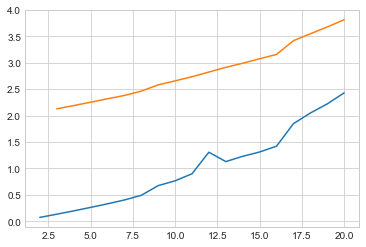

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

fig = plt.figure()
ax = plt.axes()

x = list(range(2,21))

ax.plot(x, TIMES_NODROP[:19])
ax.plot(x[1:], TIMES_1DROP)

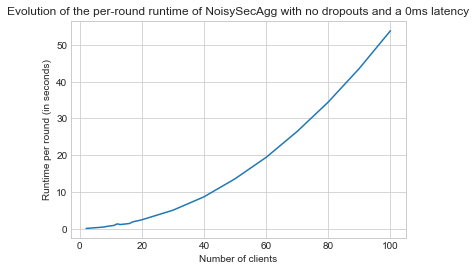

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

fig = plt.figure()
ax = plt.axes()

plt.title('Evolution of the per-round runtime of NoisySecAgg with no dropouts and a 0ms latency')
plt.xlabel('Number of clients')
plt.ylabel('Runtime per round (in seconds)')

x = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 30, 40, 50, 60, 70, 80, 90, 100]
TIMES_NODROP = [0.07388674828314011, 0.1343496878941854, 0.19756906032562258, 0.2630871613820394, 0.3307826439539591, 0.4035215059916179, 0.49192493756612143, 0.6749291976292927, 0.7660953362782796, 0.8991318623224894, 1.30727596282959, 1.129831826686859, 1.2296751618385315, 1.311664879322052, 1.4210659265518188, 1.8476926922798158, 2.048360300064087, 2.221667492389679, 2.4300354599952696, 5.0346530914306635, 8.681818294525145, 13.593776297569274, 19.419429874420167, 26.475403451919554, 34.46864809989929, 43.62159004211426, 53.84520149230957]
ax.plot(x, TIMES_NODROP)

In [72]:
TIMES_NODROP

[0.07388674828314011,
 0.1343496878941854,
 0.19756906032562258,
 0.2630871613820394,
 0.3307826439539591,
 0.4035215059916179,
 0.49192493756612143,
 0.6749291976292927,
 0.7660953362782796,
 0.8991318623224894,
 1.30727596282959,
 1.129831826686859,
 1.2296751618385315,
 1.311664879322052,
 1.4210659265518188,
 1.8476926922798158,
 2.048360300064087,
 2.221667492389679,
 2.4300354599952696,
 5.0346530914306635,
 8.681818294525145,
 13.593776297569274,
 19.419429874420167,
 26.475403451919554,
 34.46864809989929,
 43.62159004211426,
 53.84520149230957]

In [56]:
import pandas as pd

filenames = [
    'DROP_5/benchmark_20c_drop_19_1.csv',
    'DROP_10/benchmark_20c_drop_18_2.csv',
    'DROP_20/benchmark_20c_drop_16_4.csv',
    'DROP_30/benchmark_20c_drop_14_6.csv',
    'DROP_40/benchmark_20c_drop_12_8.csv',
    'DROP_49/benchmark_20c_drop_11_9.csv'
]

DDF = []
for filename in filenames:
    df = pd.read_csv(filename)
    DDF.append(df)

In [57]:
DROP_TIMES_20C = []

for i, df in enumerate(DDF):

    
    Round0Comp = df['Round0Comp'].mean()
    Round1Comp = df['Round1Comp'].mean()
    Round2Comp = df['Round2Comp'].mean()
    Round3Comp = df['Round3Comp'].mean()

    Round0Comm = df['Round0Comm'].mean()
    Round1Comm = df['Round1Comm'].mean()
    Round2Comm = df['Round2Comm'].mean()
    Round3Comm = df['Round3Comm'].mean()
    
    TotalComm = Round1Comm + Round2Comm + Round3Comm
    TotalComp = Round1Comp + Round2Comp + Round3Comp
    TOTAL = TotalComm + TotalComp
    
    print('Communication: ', TotalComm)
    print('Computation:   ', TotalComp)
    print('TOTAL:         ', TOTAL)
    
    DROP_TIMES_20C.append(TOTAL)
    
    print('-------------------------')

Communication:  11.166102695465089
Computation:    0.6465309143066407
TOTAL:          11.81263360977173
-------------------------
Communication:  11.143690919876098
Computation:    1.118347692489624
TOTAL:          12.262038612365723
-------------------------
Communication:  11.150945520401002
Computation:    1.8889852046966553
TOTAL:          13.039930725097658
-------------------------
Communication:  11.152396965026854
Computation:    2.434769058227539
TOTAL:          13.587166023254394
-------------------------
Communication:  11.168386650085449
Computation:    2.7649293422698973
TOTAL:          13.933315992355347
-------------------------
Communication:  11.167553997039796
Computation:    2.841191101074219
TOTAL:          14.008745098114016
-------------------------


In [58]:
import pandas as pd

filenames = [
    'DROP_5/benchmark_30c_drop_29_1.csv',
    'DROP_10/benchmark_30c_drop_27_3.csv',
    'DROP_20/benchmark_30c_drop_24_6.csv',
    'DROP_30/benchmark_30c_drop_21_9.csv',
    'DROP_40/benchmark_30c_drop_18_12.csv',
    'DROP_49/benchmark_30c_drop_16_14.csv'
]

DDF = []
for filename in filenames:
    df = pd.read_csv(filename)
    DDF.append(df)

In [59]:
DROP_TIMES_30C = []

for i, df in enumerate(DDF):

    
    Round0Comp = df['Round0Comp'].mean()
    Round1Comp = df['Round1Comp'].mean()
    Round2Comp = df['Round2Comp'].mean()
    Round3Comp = df['Round3Comp'].mean()

    Round0Comm = df['Round0Comm'].mean()
    Round1Comm = df['Round1Comm'].mean()
    Round2Comm = df['Round2Comm'].mean()
    Round3Comm = df['Round3Comm'].mean()
    
    TotalComm = Round1Comm + Round2Comm + Round3Comm
    TotalComp = Round1Comp + Round2Comp + Round3Comp
    TOTAL = TotalComm + TotalComp
    
    print('Communication: ', TotalComm)
    print('Computation:   ', TotalComp)
    print('TOTAL:         ', TOTAL)
    
    DROP_TIMES_30C.append(TOTAL)
    
    print('-------------------------')

Communication:  12.406760787963867
Computation:    1.1068969726562499
TOTAL:          13.513657760620116
-------------------------
Communication:  12.41892671585083
Computation:    2.5408827304840087
TOTAL:          14.95980944633484
-------------------------
Communication:  12.411641073226928
Computation:    4.281466054916382
TOTAL:          16.69310712814331
-------------------------
Communication:  12.412697362899781
Computation:    5.549679946899414
TOTAL:          17.962377309799194
-------------------------
Communication:  14.30653464794159
Computation:    5.418541848659515
TOTAL:          19.725076496601105
-------------------------
Communication:  12.394002079963684
Computation:    7.293550252914429
TOTAL:          19.687552332878113
-------------------------


In [60]:
import pandas as pd

filenames = [
    'DROP_5/benchmark_40c_drop_38_2.csv',
    'DROP_10/benchmark_40c_drop_36_4.csv',
    'DROP_20/benchmark_40c_drop_32_8.csv',
    'DROP_30/benchmark_40c_drop_28_12.csv',
    'DROP_40/benchmark_40c_drop_24_16.csv',
    'DROP_49/benchmark_40c_drop_21_19.csv'
]

DDF = []
for filename in filenames:
    df = pd.read_csv(filename)
    DDF.append(df)

In [61]:
DROP_TIMES_40C = []

for i, df in enumerate(DDF):

    
    Round0Comp = df['Round0Comp'].mean()
    Round1Comp = df['Round1Comp'].mean()
    Round2Comp = df['Round2Comp'].mean()
    Round3Comp = df['Round3Comp'].mean()

    Round0Comm = df['Round0Comm'].mean()
    Round1Comm = df['Round1Comm'].mean()
    Round2Comm = df['Round2Comm'].mean()
    Round3Comm = df['Round3Comm'].mean()
    
    TotalComm = Round1Comm + Round2Comm + Round3Comm
    TotalComp = Round1Comp + Round2Comp + Round3Comp
    TOTAL = TotalComm + TotalComp
    
    print('Communication: ', TotalComm)
    print('Computation:   ', TotalComp)
    print('TOTAL:         ', TOTAL)
    
    DROP_TIMES_40C.append(TOTAL)
    
    print('-------------------------')

Communication:  14.058127117156982
Computation:    2.8175949096679687
TOTAL:          16.87572202682495
-------------------------
Communication:  14.085658740997314
Computation:    4.687559413909912
TOTAL:          18.773218154907227
-------------------------
Communication:  34.062872648239136
Computation:    7.673275566101075
TOTAL:          41.73614821434021
-------------------------
Communication:  34.04789719581604
Computation:    9.82484712600708
TOTAL:          43.87274432182312
-------------------------
Communication:  64.04509077072144
Computation:    11.0495361328125
TOTAL:          75.09462690353395
-------------------------
Communication:  65.76871571540832
Computation:    11.41337914466858
TOTAL:          77.1820948600769
-------------------------


In [62]:
import pandas as pd

filenames = [
    'DROP_5/benchmark_50c_drop_48_2.csv',
    'DROP_10/benchmark_50c_drop_45_5.csv',
    'DROP_20/benchmark_50c_drop_40_10.csv',
    'DROP_30/benchmark_50c_drop_35_15.csv',
    'DROP_40/benchmark_50c_drop_30_20.csv',
#    'DROP_49/benchmark_50c_drop_26_24.csv'
]

DDF = []
for filename in filenames:
    df = pd.read_csv(filename)
    DDF.append(df)

In [63]:
DROP_TIMES_50C = []

for i, df in enumerate(DDF):

    
    Round0Comp = df['Round0Comp'].mean()
    Round1Comp = df['Round1Comp'].mean()
    Round2Comp = df['Round2Comp'].mean()
    Round3Comp = df['Round3Comp'].mean()

    Round0Comm = df['Round0Comm'].mean()
    Round1Comm = df['Round1Comm'].mean()
    Round2Comm = df['Round2Comm'].mean()
    Round3Comm = df['Round3Comm'].mean()
    
    TotalComm = Round1Comm + Round2Comm + Round3Comm
    TotalComp = Round1Comp + Round2Comp + Round3Comp
    TOTAL = TotalComm + TotalComp
    
    print('Communication: ', TotalComm)
    print('Computation:   ', TotalComp)
    print('TOTAL:         ', TOTAL)
    
    DROP_TIMES_50C.append(TOTAL)
    
    print('-------------------------')

Communication:  66.26159071922302
Computation:    3.9350021362304686
TOTAL:          70.19659285545349
-------------------------
Communication:  66.18634710311889
Computation:    7.300895309448243
TOTAL:          73.48724241256713
-------------------------
Communication:  67.96717448234558
Computation:    12.048327112197876
TOTAL:          80.01550159454347
-------------------------
Communication:  79.23224487304688
Computation:    16.018953227996825
TOTAL:          95.25119810104371
-------------------------
Communication:  65.73247615496317
Computation:    11.39713740348816
TOTAL:          77.12961355845133
-------------------------


In [107]:
import pandas as pd

filenames = [
    'DROP_5/benchmark_75c_drop_72_3.csv',
    'DROP_10/benchmark_75c_drop_68_7.csv',
    'DROP_20/benchmark_75c_drop_60_15.csv',
    'DROP_30/benchmark_75c_drop_53_22.csv',
    #'DROP_40/benchmark_75c_drop_45_30.csv',
    #'DROP_49/benchmark_75c_drop_38_37.csv'
]

DDF = []
for filename in filenames:
    df = pd.read_csv(filename)
    DDF.append(df)

In [65]:
DROP_TIMES_75C = []

for i, df in enumerate(DDF):
    
    Round0Comp = df['Round0Comp'].mean()
    Round1Comp = df['Round1Comp'].mean()
    Round2Comp = df['Round2Comp'].mean()
    Round3Comp = df['Round3Comp'].mean()

    Round0Comm = df['Round0Comm'].mean()
    Round1Comm = df['Round1Comm'].mean()
    Round2Comm = df['Round2Comm'].mean()
    Round3Comm = df['Round3Comm'].mean()
    
    TotalComm = Round1Comm + Round2Comm + Round3Comm
    TotalComp = Round1Comp + Round2Comp + Round3Comp
    TOTAL = TotalComm + TotalComp
    
    print('Communication: ', TotalComm)
    print('Computation:   ', TotalComp)
    print('TOTAL:         ', TOTAL)
    
    DROP_TIMES_75C.append(TOTAL)
    
    print('-------------------------')

Communication:  73.6460389137268
Computation:    9.660015201568603
TOTAL:          83.3060541152954
-------------------------
Communication:  77.28293223381043
Computation:    16.394146108627318
TOTAL:          93.67707834243774
-------------------------
Communication:  83.09868049621582
Computation:    28.193560791015624
TOTAL:          111.29224128723145
-------------------------
Communication:  89.44511728286744
Computation:    35.99338879585267
TOTAL:          125.43850607872011
-------------------------


In [66]:
import pandas as pd

filenames = [
    'DROP_5/benchmark_100c_drop_95_5.csv',
    'DROP_10/benchmark_100c_drop_90_10.csv',
    'DROP_20/benchmark_100c_drop_80_20.csv',
    'DROP_30/benchmark_100c_drop_70_30.csv',
    #'DROP_40/benchmark_100c_drop_60_40.csv',
    #'DROP_49/benchmark_100c_drop_51_49.csv'
]

DDF = []
for filename in filenames:
    df = pd.read_csv(filename)
    DDF.append(df)

In [67]:
DROP_TIMES_100C = []

for i, df in enumerate(DDF):
    
    Round0Comp = df['Round0Comp'].mean()
    Round1Comp = df['Round1Comp'].mean()
    Round2Comp = df['Round2Comp'].mean()
    Round3Comp = df['Round3Comp'].mean()

    Round0Comm = df['Round0Comm'].mean()
    Round1Comm = df['Round1Comm'].mean()
    Round2Comm = df['Round2Comm'].mean()
    Round3Comm = df['Round3Comm'].mean()
    
    TotalComm = Round1Comm + Round2Comm + Round3Comm
    TotalComp = Round1Comp + Round2Comp + Round3Comp
    TOTAL = TotalComm + TotalComp
    
    print('Communication: ', TotalComm)
    print('Computation:   ', TotalComp)
    print('TOTAL:         ', TOTAL)
    
    DROP_TIMES_100C.append(TOTAL)
    
    print('-------------------------')

Communication:  93.68576426506043
Computation:    23.102672147750855
TOTAL:          116.78843641281128
-------------------------
Communication:  90.45427632331848
Computation:    29.3461856842041
TOTAL:          119.80046200752258
-------------------------
Communication:  108.04027247428893
Computation:    39.6262092590332
TOTAL:          147.66648173332214
-------------------------
Communication:  91.55208582878112
Computation:    40.604974317550656
TOTAL:          132.1570601463318
-------------------------


11.81263360977173
13.513657760620116


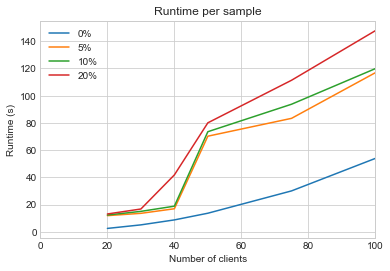

In [116]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

fig = plt.figure()
ax = plt.axes()

plt.title('Runtime per sample')
plt.xlabel('Number of clients')
plt.xlim(0,100)
plt.ylabel('Runtime (s)')

x = [20, 30, 40, 50, 75, 100]

TIMES_DROP_0 = [2.4300354599952696, 5.0346530914306635, 8.681818294525145, 13.593776297569274, 30.0, 53.84520149230957]
TIMES_DROP_5 = [DROP_TIMES_20C[0], DROP_TIMES_30C[0], DROP_TIMES_40C[0], DROP_TIMES_50C[0], DROP_TIMES_75C[0], DROP_TIMES_100C[0]]
TIMES_DROP_10 = [DROP_TIMES_20C[1], DROP_TIMES_30C[1], DROP_TIMES_40C[1], DROP_TIMES_50C[1], DROP_TIMES_75C[1], DROP_TIMES_100C[1]]
TIMES_DROP_20 = [DROP_TIMES_20C[2], DROP_TIMES_30C[2], DROP_TIMES_40C[2], DROP_TIMES_50C[2], DROP_TIMES_75C[2], DROP_TIMES_100C[2]]
TIMES_DROP_30 = [DROP_TIMES_20C[3], DROP_TIMES_30C[3], DROP_TIMES_40C[3], DROP_TIMES_50C[3], DROP_TIMES_75C[3], DROP_TIMES_100C[3]]

ax.plot(x, TIMES_DROP_0)
ax.plot(x, TIMES_DROP_5)
ax.plot(x, TIMES_DROP_10)
ax.plot(x, TIMES_DROP_20)
#ax.plot(x, TIMES_DROP_30)

ax.legend(['0%', '5%', '10%', '20%', '30%'])

print(DROP_TIMES_20C[0])
print(DROP_TIMES_30C[0])

In [86]:
import pandas as pd

DDF = []
for i in range(2,11):
    filename = f'GOOD_100ms_latency/good_{i}c_nodrop_l100ms.csv'
    df = pd.read_csv(filename)
    DDF.append(df)

In [87]:
TIMES_L100MS = []

for i, df in enumerate(DDF):
    
    Round0Comp = df['Round0Comp'].mean()
    Round1Comp = df['Round1Comp'].mean()
    Round2Comp = df['Round2Comp'].mean()
    Round3Comp = df['Round3Comp'].mean()

    Round0Comm = df['Round0Comm'].mean()
    Round1Comm = df['Round1Comm'].mean()
    Round2Comm = df['Round2Comm'].mean()
    Round3Comm = df['Round3Comm'].mean()
    
    TotalComm = Round1Comm + Round2Comm + Round3Comm
    TotalComp = Round1Comp + Round2Comp + Round3Comp
    TOTAL = TotalComm + TotalComp
    
    print('Communication: ', TotalComm)
    print('Computation:   ', TotalComp)
    print('TOTAL:         ', TOTAL)
    
    TIMES_L100MS.append(TOTAL)
    
    print('-------------------------')

Communication:  0.6714201768239338
Computation:    0.002691109975179036
TOTAL:          0.6741112867991129
-------------------------
Communication:  0.7295140425364176
Computation:    0.004135767618815104
TOTAL:          0.7336498101552327
-------------------------
Communication:  0.7889979680379232
Computation:    0.006219625473022461
TOTAL:          0.7952175935109457
-------------------------
Communication:  0.8561476071675619
Computation:    0.008353789647420248
TOTAL:          0.8645013968149822
-------------------------
Communication:  0.9198486804962159
Computation:    0.011902888615926106
TOTAL:          0.9317515691121421
-------------------------
Communication:  0.9839905103047688
Computation:    0.014884074529012043
TOTAL:          0.9988745848337809
-------------------------
Communication:  1.0739255746205647
Computation:    0.019805908203125
TOTAL:          1.0937314828236897
-------------------------
Communication:  1.2494631608327231
Computation:    0.023283163706461586


In [94]:
TIMES_L0MS = [0.07388674828314011, 0.1343496878941854, 0.19756906032562258, 0.2630871613820394, 0.3307826439539591, 0.4035215059916179, 0.49192493756612143, 0.6749291976292927, 0.7660953362782796]

print( TIMES_L0MS )
print( TIMES_L5MS )
print( TIMES_L50MS )
print( TIMES_L100MS )

[0.07388674828314011, 0.1343496878941854, 0.19756906032562258, 0.2630871613820394, 0.3307826439539591, 0.4035215059916179, 0.49192493756612143, 0.6749291976292927, 0.7660953362782796]
[0.10420012474060059, 0.16313219070434568, 0.22523895899454754, 0.30063112576802575, 0.35507257779439294, 0.43286848068237305, 0.541140635808309, 0.7014080683390299, 0.7941312789916992]
[0.373722235361735, 0.43376159667968744, 0.4948921998341878, 0.5609947840372721, 0.6219339370727539, 0.6968345642089844, 0.7974247932434082, 0.9703470071156819, 1.0625943342844646]
[0.6741112867991129, 0.7336498101552327, 0.7952175935109457, 0.8645013968149822, 0.9317515691121421, 0.9988745848337809, 1.0937314828236897, 1.2727463245391848, 1.366686503092448]


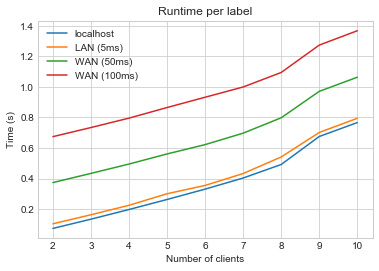

In [99]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

fig = plt.figure()
ax = plt.axes()

plt.title('Runtime per label')
plt.xlabel('Number of clients')
plt.ylabel('Time (s)')

x = range(2,11)

ax.plot(x, TIMES_L0MS)
ax.plot(x, TIMES_L5MS)
ax.plot(x, TIMES_L50MS)
ax.plot(x, TIMES_L100MS)

ax.legend(['localhost', 'LAN (5ms)', 'WAN (50ms)', 'WAN (100ms)'])